In [148]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
print("TensorFlow v" + tf.__version__)

TensorFlow v2.13.0


In [149]:
train = pd.read_csv('./spaceship-titanic/train.csv')
test = pd.read_csv('./spaceship-titanic/test.csv')
train.describe()
train.info()
train.corr()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


C:\Users\111\AppData\Local\Temp\ipykernel_25284\489434985.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


<AxesSubplot:xlabel='Destination', ylabel='Transported'>

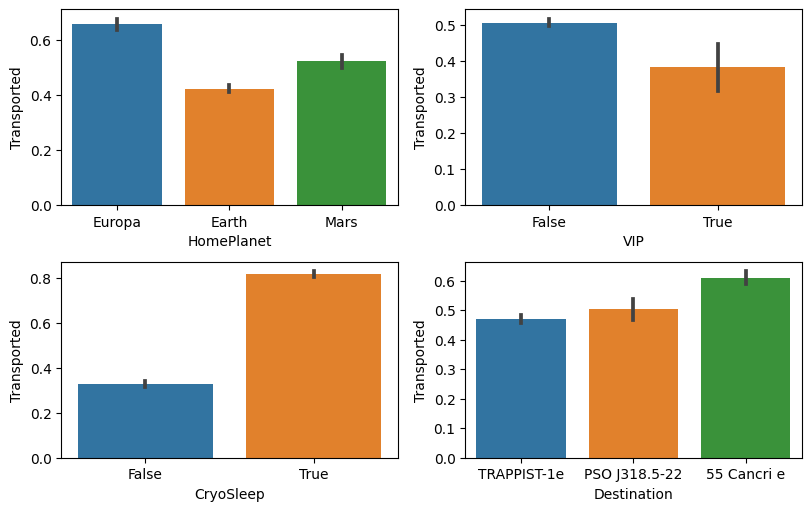

In [150]:
fig, ax =plt.subplots(2,2,constrained_layout=True, figsize=(8, 5))
sns.barplot(x='HomePlanet', y='Transported', data=train, ax=ax[0][0])
sns.barplot(x='VIP', y='Transported', data=train, ax=ax[0][1])
sns.barplot(x='CryoSleep', y='Transported', data=train, ax=ax[1][0])
sns.barplot(x='Destination', y='Transported', data=train, ax=ax[1][1])


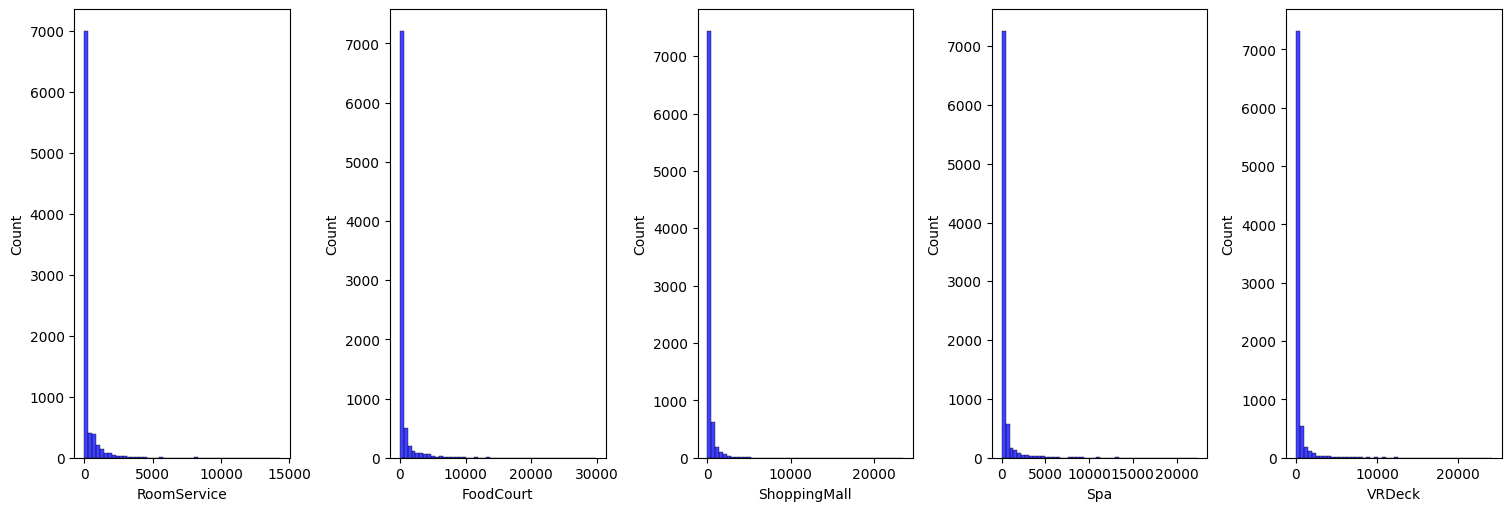

In [151]:
fig, ax =plt.subplots(1,5,constrained_layout=True, figsize=(15, 5))
sns.histplot(train['RoomService'], color='b', bins=50, ax=ax[0]);
sns.histplot(train['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(train['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(train['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(train['VRDeck'], color='b', bins=50, ax=ax[4]);

增加对数据的可视化部分，方便理解数据的分布情况，同时我们可以通过各个属性和预测值的关系来判断是否需要抛弃某些属性，如姓名等.

In [152]:
train.isnull().mean() # check missing values

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
dtype: float64

In [153]:
# 将Cabin列中的数据用/分割成单独的列
train[['Deck','Num','Side']] = train['Cabin'].str.split('/',expand=True)
test[['Deck','Num','Side']] = test['Cabin'].str.split('/',expand=True)

# 抛弃其中不需要的值
train = train.drop(['Num'],axis=1)
test = test.drop(['Num'],axis=1)

# 抛弃Cabin等列
train.drop(['Cabin', 'PassengerId', 'Name'], axis=1, inplace=True)
test.drop(['Cabin', 'PassengerId', 'Name'], axis=1, inplace=True)

In [154]:
# 处理Age
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)

In [155]:
# 处理HomePlanet和Destination
train['HomePlanet'].fillna(train['HomePlanet'].mode()[0], inplace=True)
train['Destination'].fillna(train['Destination'].mode()[0], inplace=True)
test['HomePlanet'].fillna(test['HomePlanet'].mode()[0], inplace=True)
test['Destination'].fillna(test['Destination'].mode()[0], inplace=True)

In [156]:
# 处理VIP和CryoSleep
train['VIP'].fillna(train['VIP'].mode()[0], inplace=True)
train['CryoSleep'].fillna(train['CryoSleep'].mode()[0], inplace=True)
test['VIP'].fillna(test['VIP'].mode()[0], inplace=True)
test['CryoSleep'].fillna(test['CryoSleep'].mode()[0], inplace=True)
# 将bool值转换为int
train['VIP'] = train['VIP'].astype(int)
train['CryoSleep'] = train['CryoSleep'].astype(int)
test['VIP'] = test['VIP'].astype(int)
test['CryoSleep'] = test['CryoSleep'].astype(int)

In [157]:
# 处理RoomService, FoodCourt, ShoppingMall, Spa, VRDeck
train['RoomService'].fillna(train['RoomService'].mean(), inplace=True)
train['FoodCourt'].fillna(train['FoodCourt'].mean(), inplace=True)
train['ShoppingMall'].fillna(train['ShoppingMall'].mean(), inplace=True)
train['Spa'].fillna(train['Spa'].mean(), inplace=True)
train['VRDeck'].fillna(train['VRDeck'].mean(), inplace=True)
test['RoomService'].fillna(test['RoomService'].mean(), inplace=True)
test['FoodCourt'].fillna(test['FoodCourt'].mean(), inplace=True)
test['ShoppingMall'].fillna(test['ShoppingMall'].mean(), inplace=True)
test['Spa'].fillna(test['Spa'].mean(), inplace=True)
test['VRDeck'].fillna(test['VRDeck'].mean(), inplace=True)
# 根据数据能发现，CryoSleep为True时，这些值都为0
train.loc[train['CryoSleep']==1, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0
test.loc[test['CryoSleep']==1, ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = 0

In [158]:
# 处理Deck和Side
train['Deck'].fillna(train['Deck'].mode()[0], inplace=True)
train['Side'].fillna(train['Side'].mode()[0], inplace=True)
test['Deck'].fillna(test['Deck'].mode()[0], inplace=True)
test['Side'].fillna(test['Side'].mode()[0], inplace=True)

In [159]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [160]:
train.isnull().mean() # check missing values

CryoSleep                    0.0
Age                          0.0
VIP                          0.0
RoomService                  0.0
FoodCourt                    0.0
ShoppingMall                 0.0
Spa                          0.0
VRDeck                       0.0
Transported                  0.0
HomePlanet_Earth             0.0
HomePlanet_Europa            0.0
HomePlanet_Mars              0.0
Destination_55 Cancri e      0.0
Destination_PSO J318.5-22    0.0
Destination_TRAPPIST-1e      0.0
Deck_A                       0.0
Deck_B                       0.0
Deck_C                       0.0
Deck_D                       0.0
Deck_E                       0.0
Deck_F                       0.0
Deck_G                       0.0
Deck_T                       0.0
Side_P                       0.0
Side_S                       0.0
dtype: float64

In [161]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  8693 non-null   int32  
 1   Age                        8693 non-null   float64
 2   VIP                        8693 non-null   int32  
 3   RoomService                8693 non-null   float64
 4   FoodCourt                  8693 non-null   float64
 5   ShoppingMall               8693 non-null   float64
 6   Spa                        8693 non-null   float64
 7   VRDeck                     8693 non-null   float64
 8   Transported                8693 non-null   bool   
 9   HomePlanet_Earth           8693 non-null   uint8  
 10  HomePlanet_Europa          8693 non-null   uint8  
 11  HomePlanet_Mars            8693 non-null   uint8  
 12  Destination_55 Cancri e    8693 non-null   uint8  
 13  Destination_PSO J318.5-22  8693 non-null   uint8

In [162]:
train.head(10)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0,...,0,1,0,0,0,0,0,0,1,0
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,1,...,0,0,0,0,0,1,0,0,0,1
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,...,1,0,0,0,0,0,0,0,0,1
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,...,1,0,0,0,0,0,0,0,0,1
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1,...,0,0,0,0,0,1,0,0,0,1
5,0,44.0,0,0.0,483.0,0.0,291.0,0.0,True,1,...,0,0,0,0,0,1,0,0,1,0
6,0,26.0,0,42.0,1539.0,3.0,0.0,0.0,True,1,...,0,0,0,0,0,1,0,0,0,1
7,1,28.0,0,0.0,0.0,0.0,0.0,0.0,True,1,...,0,0,0,0,0,0,1,0,0,1
8,0,35.0,0,0.0,785.0,17.0,216.0,0.0,True,1,...,0,0,0,0,0,1,0,0,0,1
9,1,14.0,0,0.0,0.0,0.0,0.0,0.0,True,0,...,0,1,0,0,0,0,0,0,1,0


In [163]:
# 归一化处理（补充）使用standardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = scaler.fit_transform(train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
test[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = scaler.transform(test[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])
test.head(10)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
0,1,-0.127486,0,-0.337774,-0.284907,-0.287473,-0.274517,-0.267035,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0,-0.685435,0,-0.337774,-0.279263,-0.287473,2.234971,-0.267035,1,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0.151488,0,-0.337774,-0.284907,-0.287473,-0.274517,-0.267035,0,1,...,0,0,1,0,0,0,0,0,0,1
3,0,0.639693,0,-0.337774,3.885969,-0.287473,-0.113618,0.249072,0,1,...,0,0,1,0,0,0,0,0,0,1
4,0,-0.615692,0,-0.322622,-0.284907,0.775006,-0.274517,-0.267035,1,0,...,0,0,0,0,0,1,0,0,0,1
5,0,0.151488,0,-0.337774,0.727716,0.152578,-0.174066,-0.214101,1,0,...,0,0,0,0,0,1,0,0,1,0
6,1,-0.545948,0,-0.337774,-0.284907,-0.287473,-0.274517,-0.267035,0,1,...,0,1,0,0,0,0,0,0,1,0
7,1,-0.615692,0,-0.337774,-0.284907,-0.287473,-0.274517,-0.267035,0,1,...,0,0,0,1,0,0,0,0,0,1
8,1,-0.406461,0,-0.337774,-0.284907,-0.287473,-0.274517,-0.267035,0,1,...,0,0,0,1,0,0,0,0,0,1
9,0,-0.336717,0,-0.337774,0.115753,-0.287473,-0.274517,-0.267035,1,0,...,0,0,0,0,0,1,0,0,0,1


完成数据处理前的可视化部分后，需要进行特征工程，对数据进行处理，使其符合模型的要求，如将文本数据转换为数值型数据，将缺失值进行填充，数据拆分，独热编码等。
## 可能有如下优化（仅针对特征工程部分）
1. 考虑的决策树的特征，如TFDF，xgboost，决策森林等能够自适应特征，先不对特征进行归一化处理，后续可以考虑对特征进行归一化处理，看看是否会有提升。
2. Age的取值也很多，将不同Age的人按照年龄分类
3. 是否应该考虑特征的语境意义进行不同的处理
4. 突然想到Name似乎也能挖掘出性别信息，之后可以考虑
5. ID信息包含了同行人数，康康同行人数是否会影响生存率
6. Cabin的num抛弃了，不知道有没有实际影响

等无聊的时候再慢慢尝试吧，先准备ICR的比赛

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# 数据集划分
y = train.Transported.copy()
x = train.drop(['Transported'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

In [165]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(splitter='best', max_depth=8, criterion='entropy', random_state=3)
decision_tree.fit(x_train, y_train)
decision_tree_pred = decision_tree.predict(x_test)
decision_tree_accuracy = accuracy_score(decision_tree_pred, y_test)

decision_tree_accuracy

0.7941345600920069

In [166]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=25, random_state = 27 ,max_depth = 11)
random_forest.fit(x_train, y_train)
random_forest_pred = random_forest.predict(x_test)
random_forest_accuracy = accuracy_score(random_forest_pred, y_test)

random_forest_accuracy

0.8056354226566993

In [167]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state = 42)
gbc.fit(x_train, y_train)
gbc_pred = gbc.predict(x_test)
gbc_accuracy = accuracy_score(gbc_pred, y_test)

gbc_accuracy

0.8085106382978723

In [168]:
from lightgbm import LGBMClassifier
lgbmc = LGBMClassifier(learning_rate=0.005, num_iterations=775)
lgbmc.fit(x_train, y_train)
lgbmc_pred = lgbmc.predict(x_test)
lgbmc_accuracy = accuracy_score(lgbmc_pred, y_test)

lgbmc_accuracy

c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3482, number of negative: 3472
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000643 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1388
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500719 -> initscore=0.002876
[LightGBM] [Info] Start training from score 0.002876


0.8131109833237493

In [169]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgbc = HistGradientBoostingClassifier()
hgbc.fit(x_train,y_train)
hgbc_pred = hgbc.predict(x_test)
hgbc_accuracy = accuracy_score(hgbc_pred, y_test)

hgbc_accuracy


0.8050603795284647

In [170]:
# 逻辑回归，logistic
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs')
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_accuracy = accuracy_score(lr_pred, y_test)

lr_accuracy

0.8056354226566993

模型搭建

In [177]:
# 模型融合

from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[('lgbmc', lgbmc), ('hgbc', hgbc), ('gbc', gbc), ('random_forest', random_forest), ('decision_tree', decision_tree)], voting='soft')
voting_clf.fit(x_train, y_train)
voting_pred = voting_clf.predict(x_test)
voting_accuracy = accuracy_score(voting_pred, y_test)

voting_accuracy

c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3482, number of negative: 3472
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000692 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1388
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500719 -> initscore=0.002876
[LightGBM] [Info] Start training from score 0.002876


0.8154111558366878

In [172]:
# 模型融合 StackingCVClassifier
from mlxtend.classifier import StackingCVClassifier
# from sklearn.model_selection import cross_val_score

sclf = StackingCVClassifier(classifiers=[decision_tree, random_forest, gbc, hgbc, lgbmc], meta_classifier=lr, cv=5)
sclf.fit(x_train, y_train)
sclf_pred = sclf.predict(x_test)
sclf_accuracy = accuracy_score(sclf_pred, y_test)
# scores = cross_val_score(sclf, x_train, y_train, cv=3, scoring='accuracy')
# print(scores.mean())
sclf_accuracy

c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2786, number of negative: 2777
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1385
[LightGBM] [Info] Number of data points in the train set: 5563, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500809 -> initscore=0.003236
[LightGBM] [Info] Start training from score 0.003236


c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2786, number of negative: 2777
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1388
[LightGBM] [Info] Number of data points in the train set: 5563, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500809 -> initscore=0.003236
[LightGBM] [Info] Start training from score 0.003236


c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2785, number of negative: 2778
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1388
[LightGBM] [Info] Number of data points in the train set: 5563, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500629 -> initscore=0.002517
[LightGBM] [Info] Start training from score 0.002517


c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2785, number of negative: 2778
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000617 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 5563, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500629 -> initscore=0.002517
[LightGBM] [Info] Start training from score 0.002517


c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2786, number of negative: 2778
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 5564, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500719 -> initscore=0.002876
[LightGBM] [Info] Start training from score 0.002876


c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3482, number of negative: 3472
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1388
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500719 -> initscore=0.002876
[LightGBM] [Info] Start training from score 0.002876


0.81196089706728

In [178]:
# stack but sklearn
from sklearn.ensemble import StackingClassifier
estimators = [('lgbmc', lgbmc), ('hgbc', hgbc), ('gbc', gbc), ('random_forest', random_forest), ('decision_tree', decision_tree)]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=lr)
stacking_clf.fit(x_train, y_train)
stacking_pred = stacking_clf.predict(x_test)

stacking_accuracy = accuracy_score(stacking_pred, y_test)
stacking_accuracy

c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3482, number of negative: 3472
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000773 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1388
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500719 -> initscore=0.002876
[LightGBM] [Info] Start training from score 0.002876


c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2786, number of negative: 2777
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000557 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1388
[LightGBM] [Info] Number of data points in the train set: 5563, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500809 -> initscore=0.003236
[LightGBM] [Info] Start training from score 0.003236


c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2786, number of negative: 2777
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 5563, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500809 -> initscore=0.003236
[LightGBM] [Info] Start training from score 0.003236


c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2785, number of negative: 2778
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1385
[LightGBM] [Info] Number of data points in the train set: 5563, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500629 -> initscore=0.002517
[LightGBM] [Info] Start training from score 0.002517


c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2785, number of negative: 2778
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 5563, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500629 -> initscore=0.002517
[LightGBM] [Info] Start training from score 0.002517


c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2786, number of negative: 2778
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000288 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 5564, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500719 -> initscore=0.002876
[LightGBM] [Info] Start training from score 0.002876


0.8131109833237493

In [180]:
# 无限套娃
estimators = [('sclf', sclf), ('stacking_clf', stacking_clf), ('voting_clf', voting_clf)]
voting_clf1 = VotingClassifier(estimators=estimators, voting='soft')
voting_clf1.fit(x_train, y_train)
voting_pred = voting_clf1.predict(x_test)
voting_accuracy = accuracy_score(voting_pred, y_test)
voting_accuracy


c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2786, number of negative: 2777
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1388
[LightGBM] [Info] Number of data points in the train set: 5563, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500809 -> initscore=0.003236
[LightGBM] [Info] Start training from score 0.003236


c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2786, number of negative: 2777
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 5563, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500809 -> initscore=0.003236
[LightGBM] [Info] Start training from score 0.003236


c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2785, number of negative: 2778
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 5563, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500629 -> initscore=0.002517
[LightGBM] [Info] Start training from score 0.002517


c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2785, number of negative: 2778
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1388
[LightGBM] [Info] Number of data points in the train set: 5563, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500629 -> initscore=0.002517
[LightGBM] [Info] Start training from score 0.002517


c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2786, number of negative: 2778
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 5564, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500719 -> initscore=0.002876
[LightGBM] [Info] Start training from score 0.002876


c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3482, number of negative: 3472
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1388
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500719 -> initscore=0.002876
[LightGBM] [Info] Start training from score 0.002876


c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3482, number of negative: 3472
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1388
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500719 -> initscore=0.002876
[LightGBM] [Info] Start training from score 0.002876


c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2786, number of negative: 2777
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1388
[LightGBM] [Info] Number of data points in the train set: 5563, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500809 -> initscore=0.003236
[LightGBM] [Info] Start training from score 0.003236


c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2786, number of negative: 2777
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 5563, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500809 -> initscore=0.003236
[LightGBM] [Info] Start training from score 0.003236


c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2785, number of negative: 2778
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1385
[LightGBM] [Info] Number of data points in the train set: 5563, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500629 -> initscore=0.002517
[LightGBM] [Info] Start training from score 0.002517


c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2785, number of negative: 2778
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000284 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 5563, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500629 -> initscore=0.002517
[LightGBM] [Info] Start training from score 0.002517


c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2786, number of negative: 2778
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 5564, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500719 -> initscore=0.002876
[LightGBM] [Info] Start training from score 0.002876


c:\Users\111\AppData\Local\Programs\Python\Python38\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3482, number of negative: 3472
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1388
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500719 -> initscore=0.002876
[LightGBM] [Info] Start training from score 0.002876


0.81196089706728

In [175]:
# 模型提交

sample = pd.read_csv('./spaceship-titanic/sample_submission.csv')
sample['Transported'] = voting_clf1.predict(test).astype(bool)
sample.to_csv('submission.csv', index=False)

模型融合，这里就采用最简单的vote吧，后续可以尝试stack